In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

7397
6092


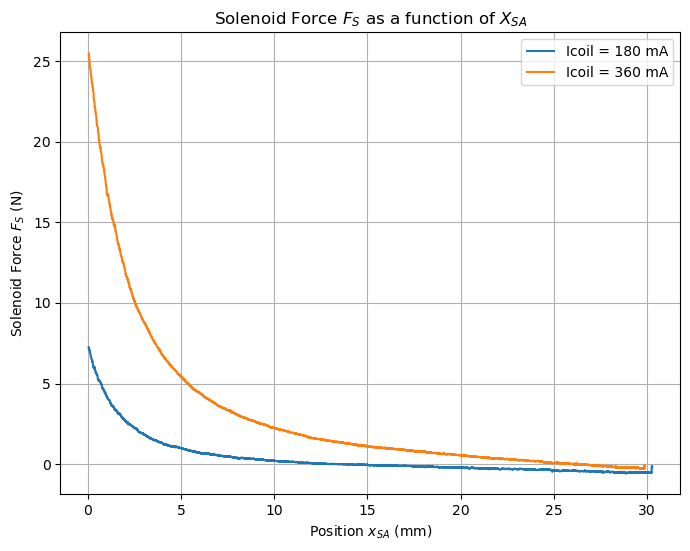

In [2]:
# Load the data
data_offset = pd.read_excel('Lab5 Part A offset.xlsx',skiprows=1)
data_180mA = pd.read_excel('Lab 5 Part A 180mA.xlsx',skiprows=1)
data_360mA = pd.read_excel('Lab5 Part A 360mA.xlsx',skiprows=1)

LVIT180 = data_180mA['LVIT (V)']
LVIT360 = data_360mA['LVIT (V)']
LVITOfset = data_offset['LVIT (V)']

positionOffset = (LVITOfset + 0.345)/0.194

loadCellOffset = data_offset['Load Cell (kg)']
loadCell180 = data_180mA['Load Cell (kg)']
loadCell360 = data_360mA['Load Cell (kg)']
start180 = np.argmax(loadCell180)
start360 = np.argmax(loadCell360)
print(start180)
print(start360)

position180 = ((LVIT180 - LVIT180[start180]) + 0.00646) / 0.1873
position360 = ((LVIT360 - LVIT360[start360]) + 0.00646) / 0.1873
#Adjust for loadcell offset
ForceOffset = (loadCellOffset[:])*9.81
Force180 = (loadCell180[:]-loadCellOffset[start180])*9.81
Force360 = (loadCell360[:]-loadCellOffset[start360])*9.81

plt.figure(figsize=(8, 6))
plt.plot(position180[:start180], Force180[:start180], label="Icoil = 180 mA")
plt.plot(position360[:start360], Force360[:start360], label="Icoil = 360 mA")

plt.xlabel("Position $x_{SA}$ (mm)")
plt.ylabel("Solenoid Force $F_{S}$ (N)")
plt.title("Solenoid Force $F_{S}$ as a function of $X_{SA}$")
plt.grid(True)
plt.legend()
plt.show()

2.08530030078


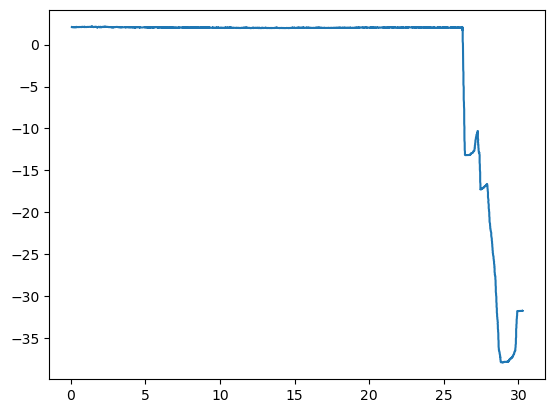

In [3]:
ForceOffset = (loadCellOffset[:])*9.81
plt.plot(position180[:start180], ForceOffset[:start180], label="Measured 180 mA")

print(ForceOffset[7000])

Parameters for 180 mA: C = 0.00151, C2 = 0.00246
Parameters for 360 mA: C = 0.00323, C2 = 0.00395


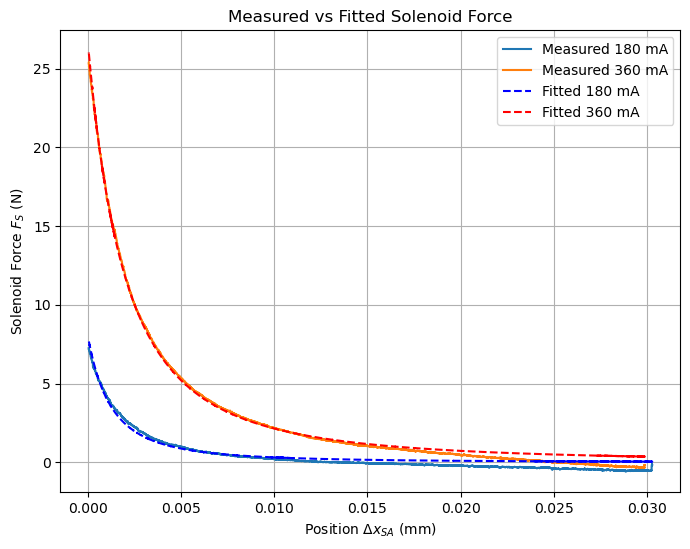

In [7]:
from scipy.optimize import curve_fit

# Define the model function
def solenoid_force(x, C, C2, I_coil):
    return (C * I_coil**2) / (C2 + x)**2

#Adjust for loadcell offset
ForceOffset = (loadCellOffset[:])*9.81
Force180 = (loadCell180[:])*9.81 - ForceOffset[7000]
Force360 = (loadCell360[:])*9.81 - ForceOffset[7000]

# print(ForceOffset)
# Curve fitting for 180 mA
params_180, _ = curve_fit(lambda x, C, C2: solenoid_force(x, C, C2, 0.18), position180[:start180]/1000, Force180[:start180], p0=[4000, 24], maxfev = 1000)

# Curve fitting for 360 mA
params_360, _ = curve_fit(lambda x, C, C2: solenoid_force(x, C, C2, 0.36), position360[:start360]/1000, Force360[:start360], p0=[4000, 24], maxfev = 1000)

# Extract parameters
C_180, C2_180 = params_180
C_360, C2_360 = params_360

# Print results
print(f"Parameters for 180 mA: C = {C_180:.5f}, C2 = {C2_180:.5f}")
print(f"Parameters for 360 mA: C = {C_360:.5f}, C2 = {C2_360:.5f}")

plt.figure(figsize=(8, 6))
plt.plot(position180[:start180]/1000, Force180[:start180], label="Measured 180 mA")
plt.plot(position360[:start360]/1000, Force360[:start360], label="Measured 360 mA")

# Current in Amps for 180 mA
plt.plot(position180[:start180]/1000, solenoid_force(position180[:start180]/1000, C_180, C2_180, 0.18), label="Fitted 180 mA", color='blue', linestyle='--')
# Current in Amps for 360 mA
plt.plot(position360[:start360]/1000, solenoid_force(position360[:start360]/1000, C_360, C2_360, 0.36), label="Fitted 360 mA", color='red', linestyle='--')


plt.xlabel("Position $\Delta x_{SA}$ (mm)")
plt.ylabel("Solenoid Force $F_{S}$ (N)")
plt.title("Measured vs Fitted Solenoid Force")
plt.grid(True)
plt.legend()
plt.show()


0.5135326753959398
0.30343607492186864
Mean Resistance at 180mA: 40.57356461098118
Mean Resistance at 360mA: 40.44467282090709


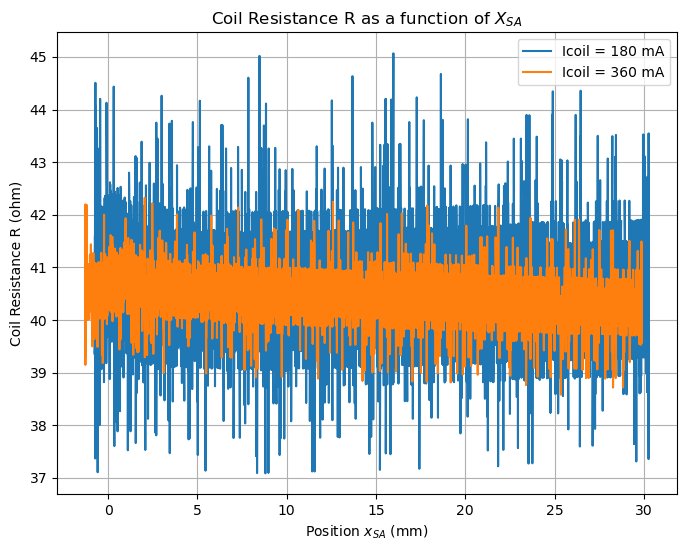

In [5]:
#Recorder power supply values to account for offsets of on coil recorded values by daq
VSupply = 5
ISupply = 0.36

I_coilO = data_offset['Coil Current (A)']
I_coil180 = data_180mA['Coil Current (A)']
I_coil360 = data_360mA['Coil Current (A)']
V_coilO = data_offset['Coil Voltage (V)']
V_coil180 = data_180mA['Coil Voltage (V)']
V_coil360 = data_360mA['Coil Voltage (V)']

#Correct Data for Current Offset
I_coil180_adjusted = I_coil180[:]-np.mean(I_coilO)
I_coil360_adjusted = I_coil360[:]-np.mean(I_coilO)
#Correct Data for Voltage Offset
V_coil180_adjusted = V_coil180[:]-np.mean(V_coilO)
V_coil360_adjusted = V_coil360[:]-np.mean(V_coilO)

# #Correct Data for Current Offset
# I_coil180_adjusted = I_coil180[:]
# I_coil360_adjusted = I_coil360[:]
# #Correct Data for Voltage Offset
# V_coil180_adjusted = V_coil180[:]
# V_coil360_adjusted = V_coil360[:]

#Calculate Coil Resistance 
R_coil180 = V_coil180_adjusted/I_coil180_adjusted
R_coil360 = V_coil360_adjusted/I_coil360_adjusted
print(np.mean(I_coilO))
print(np.mean(V_coilO))
print('Mean Resistance at 180mA:', np.mean(R_coil180))
print('Mean Resistance at 360mA:', np.mean(R_coil360))

plt.figure(figsize=(8, 6))
plt.plot(position180, R_coil180, label="Icoil = 180 mA")
plt.plot(position360, R_coil360, label="Icoil = 360 mA")


plt.xlabel("Position $x_{SA}$ (mm)")
plt.ylabel("Coil Resistance R (ohm)")
plt.title("Coil Resistance R as a function of $X_{SA}$")
plt.grid(True)
plt.legend()
plt.show()

In [6]:
# Constants
R = 40.5  # Coil resistance in ohms
file_path = 'C:/Users/kylea/Repos/MECH 420 scripts/Lab 5/Lab 5 Part B 1mm '
file_path2 = 'C:/Users/kylea/Repos/MECH 420 scripts/Lab 5/Lab 5 Part B 30mm '
frequencies = np.array([1, 3, 5, 8, 10, 50, 100, 250, 500, 1000])  # Hz
Z_measured = []
Z_measured2 = []

# Define the model function for |Z(f)|
def impedance_model(f, L):
    omega = 2 * np.pi * f
    return np.sqrt(R**2 + (omega * L)**2)

# Calculate measured impedance for each frequency (1 mm position)
for frequency in frequencies:
    data = pd.read_excel(f"{file_path}{frequency}hz.xlsx", skiprows=1)
    voltage = data['Coil Voltage (V)']
    current = data['Coil Current (A)']
    Vamp = np.max(voltage) - np.min(voltage)
    Iamp = np.max(current) - np.min(current)
    Z_measured.append(np.abs(Vamp / Iamp))

# Calculate measured impedance for each frequency (30 mm position)
for frequency in frequencies:
    data = pd.read_excel(f"{file_path2}{frequency}hz.xlsx", skiprows=1)
    voltage = data['Coil Voltage (V)']
    current = data['Coil Current (A)']
    Vamp = np.max(voltage) - np.min(voltage)
    Iamp = np.max(current) - np.min(current)
    Z_measured2.append(np.abs(Vamp / Iamp))

# Convert to numpy arrays for curve fitting
Z_measured = np.array(Z_measured)
Z_measured2 = np.array(Z_measured2)

# Exclude high-impedance region (e.g., above 500 Hz)
mask = frequencies <= 200

# Perform curve fitting to find L for 1 mm
popt_1mm, _ = curve_fit(impedance_model, frequencies[mask], Z_measured[mask], p0=[1e-3])

# Perform curve fitting to find L for 30 mm
popt_30mm, _ = curve_fit(impedance_model, frequencies[mask], Z_measured2[mask], p0=[1e-3])

L_1mm = popt_1mm[0]
L_30mm = popt_30mm[0]

print(f"Inductance at 1 mm: {L_1mm:.6f} H")
print(f"Inductance at 30 mm: {L_30mm:.6f} H")

# Plot results
plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, Z_measured, 'bo-', label='1 mm Measured')  # Measured data
plt.semilogx(frequencies, Z_measured2, 'ro-', label='30 mm Measured')  # Measured data

# Plot fitted curves
frequencies_fine = np.logspace(np.log10(min(frequencies)), np.log10(max(frequencies)), 500)
plt.semilogx(frequencies_fine, impedance_model(frequencies_fine, L_1mm), 'b--', label=f'1 mm Fit')
plt.semilogx(frequencies_fine, impedance_model(frequencies_fine, L_30mm), 'r--', label=f'30 mm Fit')
plt.ylim(0,500)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance Magnitude |Z(f)|')
plt.title('Impedance vs Frequency with Fitted Inductance')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/kylea/Repos/MECH 420 scripts/Lab 5/Lab 5 Part B 1mm 1hz.xlsx'

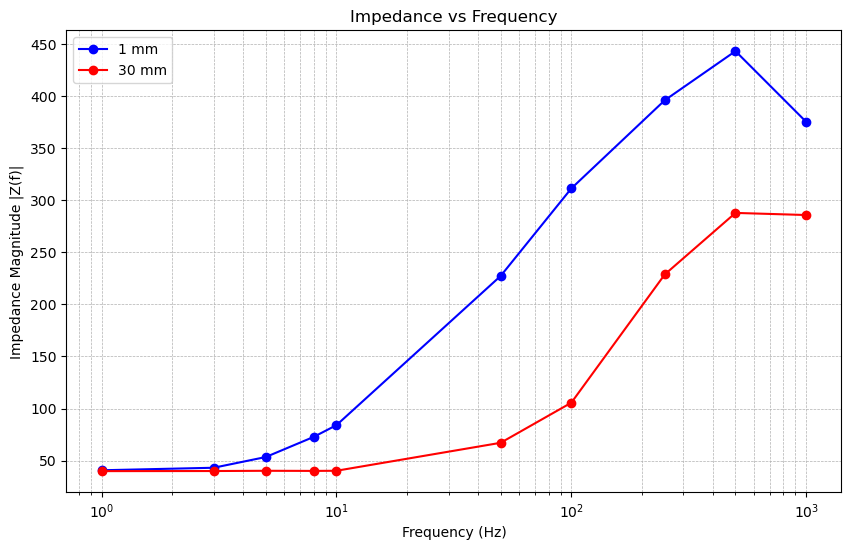

In [ ]:
Z_measured = []
Z_measured2 = []
# Calculate measured impedance for each frequency 1mm
for frequency in frequencies:
    data = pd.read_excel(f"{file_path}{frequency}hz.xlsx", skiprows=1)
    time = data['Time (s)']
    voltage = data['Coil Voltage (V)']
    current = data['Coil Current (A)']

    Vmax = np.max(voltage)
    Vmin = np.min(voltage)
    Vamp = Vmax - Vmin
    Imax = np.max(current)
    Imin = np.min(current)
    Iamp = Imax - Imin

    # Calculate and store impedance magnitude
    Z_measured.append(np.abs(Vamp / Iamp))
# Calculate measured impedance for each frequency 30mm
for frequency in frequencies:
    data = pd.read_excel(f"{file_path2}{frequency}hz.xlsx", skiprows=1)
    time = data['Time (s)']
    voltage = data['Coil Voltage (V)']
    current = data['Coil Current (A)']

    Vmax = np.max(voltage)
    Vmin = np.min(voltage)
    Vamp = Vmax - Vmin
    Imax = np.max(current)
    Imin = np.min(current)
    Iamp = Imax - Imin

    # Calculate and store impedance magnitude
    Z_measured2.append(np.abs(Vamp / Iamp))

# Plotting the impedance magnitude in dB for measured and theoretical values
plt.figure(figsize=(10, 6))
plt.semilogx(frequencies, Z_measured, 'bo-', label='1 mm')  # Logarithmic x-axis
plt.semilogx(frequencies, Z_measured2, 'ro-',  label='30 mm')  # Logarithmic x-axis
plt.xlabel('Frequency (Hz)')
plt.ylabel('Impedance Magnitude |Z(f)|')
plt.title('Impedance vs Frequency')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Show grid on both major and minor ticks
plt.show()